<a href="https://colab.research.google.com/github/ramikhouli/Oil-and-Gas-Data-Analysis/blob/main/Oil_and_Gas_Projects_1_Darcy_Law.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pressure Profile

# Chapter 1: Darcy's Law for Reservoir Pressure Profiling

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
re = 3000
rwf = 0.5
pwf = 1500
h = 60
k = 150
q = 200
mu = 15
B = 1

In [8]:
r = np.linspace(rwf,re,500)

In [9]:
pressure = []
for i in range(len(r)):
    p = pwf + (141.2*q*mu*B*(np.log(r[i]/rwf))/k/h)
    pressure.append(p)

In [10]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [11]:
plt.style.use("classic")

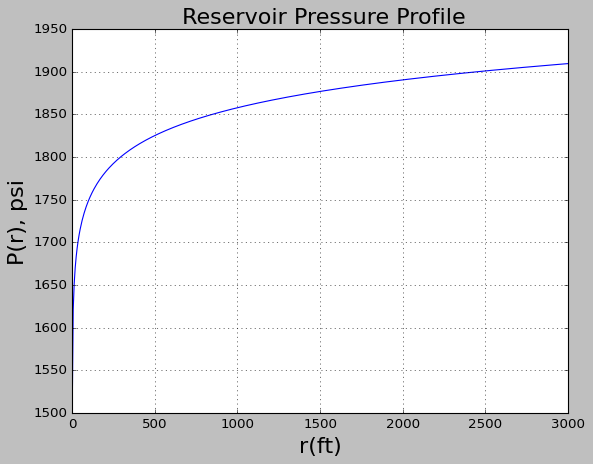

In [12]:
plt.figure(figsize=[8,6])
plt.plot(r,pressure)
plt.xlabel('r(ft)',size = 20)
plt.ylabel('P(r), psi',size = 20)
plt.title(' Reservoir Pressure Profile',size = 20)
plt.grid(True)

### Whole thing in one function:

In [7]:
def pressureprof():
    re = float(input('Outer radius of Reservoir(ft): '))
    rw = float(input('We4llbore Radius(ft): '))
    Pwf = float(input('Bottomhole Pressure(PSI): '))
    h = float(input('Net Pay Thickness(ft): '))
    k = float(input('Average Reservoir Permeability(mD): '))
    q = float(input('Flowrate(STB/Day): '))
    mu = float(input('Oil Viscosity: '))
    B = 1
    r = np.linspace(rw,re,500)
    Pressure = []
    for i in range(len(r)):
        P = Pwf + (141.2*q*mu*B*(np.log(r[i]/rw))/k/h)
        Pressure.append(P)
    plt.figure(figsize = [8,6])
    plt.plot(r,Pressure)
    plt.xlabel('r(ft)')
    plt.ylabel('P(r), Psi')
    plt.title('Reservoir Pressure Profile')
    plt.grid(True)

Outer radius of Reservoir(ft): 3000
We4llbore Radius(ft): 0.5
Bottomhole Pressure(PSI): 1500
Net Pay Thickness(ft): 60
Average Reservoir Permeability(mD): 150
Flowrate(STB/Day): 200
Oil Viscosity: 15


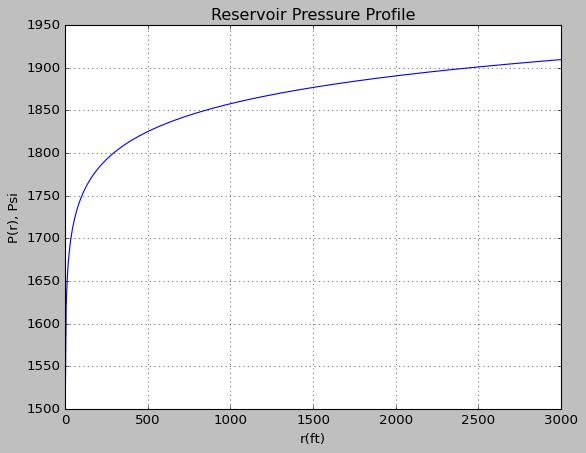

In [9]:
pressureprof()


# Chapter 2: Dynamic/GUI Pressure Profile

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive
from IPython.display import display

In [33]:
def flowprofile(k,mu,q):
    re = 3000
    rw = 0.5
    
    pe = 4000
    B =1
    h = 30
    r = np.linspace(rw,re,500)
    
    P = pe - (141.2*q*mu*B*(np.log(re/r))/k/h)
    
    y_min = P[np.where(r ==rw)]
    
    plt.figure(figsize = (9,6))
    plt.plot(r,P,linewidth = 4)
    plt.axhline(y_min,linewidth =3, color ='red')
    
    plt.ylim(0,5000)
    
    plt.xlabel('r(ft)')
    
    plt.ylabel('P(r),psi')
    
    plt.title('Dynamic Pressure Profile')
    
    plt.grid(True)


    plt.show()

    
    return r,P

In [34]:
w  = interactive(flowprofile,k = (200,1000),mu = (10,220), q = (100,200))

In [35]:
display(w)

interactive(children=(IntSlider(value=600, description='k', max=1000, min=200), IntSlider(value=115, descripti…

# #